In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Imports**

In [1]:
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsbombpy import sb

**Competitions Dataframe**

In [ ]:
#Competitions
df_competitions= sb.competitions()
df_competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


**Matches Dataframe**



In [ ]:
#Matches('competition_id', 'season_id')

df_matches = pd.DataFrame()
competition_ids= pd.unique(df_competitions.competition_id)
for competition in competition_ids:
  season_ids = pd.unique(df_competitions[df_competitions.competition_id == competition].season_id)
  for season in season_ids:
    try:
      df_match_aux= sb.matches(competition_id = competition, season_id= season)
      df_matches = df_matches.append(df_match_aux)
    except:
      print("An exception has occurred")

An exception has occurred


In [ ]:
df_matches.shape #there are 3199 games available

(3199, 22)

In [ ]:
df_matches.competition.value_counts() # Competitions available

Spain - La Liga                                      868
England - Premier League                             418
Italy - Serie A                                      381
France - Ligue 1                                     377
England - FA Women's Super League                    326
Germany - 1. Bundesliga                              306
International - FIFA World Cup                       147
International - Women's World Cup                    116
India - Indian Super league                          115
Europe - UEFA Euro                                    51
United States of America - NWSL                       36
Europe - UEFA Women's Euro                            31
Europe - Champions League                             17
Spain - Copa del Rey                                   3
Europe - UEFA Europa League                            3
Argentina - Liga Profesional                           2
North and Central America - North American League      1
International - FIFA U20 World 

In [ ]:
df_champions_matches= df_matches[(df_matches.competition=="Europe - Champions League")]
df_laliga_matches = df_matches[(df_matches.competition=="Spain - La Liga")]
df_laliga_matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3773386,2020-10-31,21:00:00.000,Spain - La Liga,2020/2021,Deportivo Alavés,Barcelona,1,1,available,available,2023-07-25T03:54:59.280826,2023-07-25T04:25:41.348202,8,Regular Season,Estadio de Mendizorroza,NaN,Pablo Javier Machín Díez,Ronald Koeman,1.1.0,2,2
1,3773565,2021-01-09,18:30:00.000,Spain - La Liga,2020/2021,Granada,Barcelona,0,4,available,available,2023-07-25T03:51:37.437064,2023-07-25T04:30:16.058384,18,Regular Season,Estadio Nuevo Los Cármenes,Ricardo De Burgos Bengoetxea,Diego Martínez Penas,Ronald Koeman,1.1.0,2,2
2,3773457,2021-05-16,18:30:00.000,Spain - La Liga,2020/2021,Barcelona,Celta Vigo,1,2,available,available,2022-12-02T09:26:39.496362,2023-04-27T23:03:53.506485,37,Regular Season,Spotify Camp Nou,NaN,Ronald Koeman,Eduardo Germán Coudet,1.1.0,2,2
3,3773631,2021-02-07,21:00:00.000,Spain - La Liga,2020/2021,Real Betis,Barcelona,2,3,available,available,2023-07-25T03:47:44.278651,2023-07-25T03:56:34.733180,22,Regular Season,Estadio Benito Villamarín,NaN,Manuel Luis Pellegrini Ripamonti,Ronald Koeman,1.1.0,2,2
4,3773665,2021-03-06,21:00:00.000,Spain - La Liga,2020/2021,Osasuna,Barcelona,0,2,available,available,2022-12-02T08:46:42.897589,2023-04-28T02:57:03.412841,26,Regular Season,Estadio El Sadar,Guillermo Cuadra Fernández,Jagoba Arrasate Elustondo,Ronald Koeman,1.1.0,2,2


In [ ]:
df_laliga_matches.season.unique()

array(['2020/2021', '2019/2020', '2018/2019', '2017/2018', '2016/2017',
       '2015/2016', '2014/2015', '2013/2014', '2012/2013', '2011/2012',
       '2010/2011', '2009/2010', '2008/2009', '2007/2008', '2006/2007',
       '2005/2006', '2004/2005', '1973/1974'], dtype=object)

In [ ]:
# df_champions_matches.season.unique()

**Events Dataframe**

In [ ]:
import requests.exceptions

# Obtain unique match IDs
unique_match_ids = df_matches['match_id'].unique()

# Initialize a list to store DataFrames
event_dfs = []

# Iterate through unique match IDs
for match in unique_match_ids:
    try:
        # Retrieve events DataFrame for the current match
        df_event_aux = sb.events(match_id=match)

        # Append to the list of DataFrames
        event_dfs.append(df_event_aux)

    except requests.exceptions.RequestException as e:
        print(f"An exception has occurred for match {match}: {e}")

# Concatenate the list of DataFrames into a single DataFrame
df_events = pd.concat(event_dfs, ignore_index=True)



In [ ]:
#Champions League Events

import requests.exceptions

# Obtain unique match IDs
unique_match_ids = df_champions_matches['match_id'].unique()

# Initialize a list to store DataFrames
event_dfs = []

# Iterate through unique match IDs
for match in unique_match_ids:
    try:
        # Retrieve events DataFrame for the current match
        df_event_aux = sb.events(match_id=match)

        # Append to the list of DataFrames
        event_dfs.append(df_event_aux)

    except requests.exceptions.RequestException as e:
        print(f"An exception has occurred for match {match}: {e}")

# Concatenate the list of DataFrames into a single DataFrame
df_champions_events = pd.concat(event_dfs, ignore_index=True)

In [ ]:
#Laliga Events

import requests.exceptions

# Obtain unique match IDs
unique_match_ids = df_laliga_matches['match_id'].unique()

# Initialize a list to store DataFrames
event_dfs = []

# Iterate through unique match IDs
for match in unique_match_ids:
    try:
        # Retrieve events DataFrame for the current match
        df_event_aux = sb.events(match_id=match)

        # Append to the list of DataFrames
        event_dfs.append(df_event_aux)

    except requests.exceptions.RequestException as e:
        print(f"An exception has occurred for match {match}: {e}")

# Concatenate the list of DataFrames into a single DataFrame
df_laliga_events = pd.concat(event_dfs, ignore_index=True)

In [ ]:
df_laliga_events.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Ball Recovery', 'Dribbled Past', 'Dribble', 'Block',
       'Miscontrol', 'Foul Committed', 'Foul Won', 'Duel', 'Dispossessed',
       'Clearance', 'Interception', 'Shot', 'Goal Keeper', 'Error',
       'Injury Stoppage', 'Bad Behaviour', 'Substitution', 'Half End',
       'Tactical Shift', 'Referee Ball-Drop', '50/50', 'Offside',
       'Shield', 'Own Goal For', 'Own Goal Against', 'Player Off',
       'Player On', 'Camera off', 'Camera On'], dtype=object)

**Shots Dataframe**

In [ ]:
pd.set_option("display.max_columns", None)
# df_champions_shots = df_champions_events[df_champions_events.type =="Shot"]
df_laliga_shots = df_laliga_events[df_laliga_events.type =="Shot"]

In [ ]:
df_champions_shots.shape

(567, 107)

In [ ]:
df_laliga_shots.shape

(21210, 116)

In [ ]:
# Champions League Shots Dataframe
df_champions_shots = df_champions_shots[['id','location','match_id','minute','second',
          'play_pattern','player','player_id',
          'position','possession','possession_team',
         'possession_team_id','related_events','team','team_id','type','under_pressure',
         'shot_body_part','shot_end_location','shot_first_time','shot_freeze_frame',
          'shot_one_on_one','shot_redirect','shot_key_pass_id','shot_deflected','shot_open_goal','goalkeeper_lost_in_play',
          'shot_outcome','shot_statsbomb_xg','shot_technique','shot_type']]

In [ ]:
# Laliga Shots Dataframe

df_laliga_shots = df_laliga_shots[['id','location','match_id','minute','second',
          'play_pattern','player','player_id',
          'position','possession','possession_team',
         'possession_team_id','related_events','team','team_id','type','under_pressure',
         'shot_body_part','shot_end_location','shot_first_time','shot_freeze_frame',
          'shot_one_on_one','shot_redirect','shot_key_pass_id','shot_deflected','shot_open_goal','goalkeeper_lost_in_play',
          'shot_outcome','shot_statsbomb_xg','shot_technique','shot_type']]

In [ ]:
df_champions_shots = df_champions_shots[~df_champions_shots.shot_freeze_frame.isna()]
df_laliga_shots = df_laliga_shots[~df_laliga_shots.shot_freeze_frame.isna()]
df_laliga_shots.head()

,id,location,match_id,minute,second,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,team,team_id,type,under_pressure,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_one_on_one,shot_redirect,shot_key_pass_id,shot_deflected,shot_open_goal,goalkeeper_lost_in_play,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
3805,c5341577-e1ca-4742-98fb-dc745cbbe103,"[108.6, 28.0]",3773386,12,19,From Throw In,Anssumane Fati,30756.0,Left Wing,27,Barcelona,217,[ce9cfc1e-f43c-41db-9f5c-8440b1341480],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 47.8, 0.0]",NaN,"[{'location': [91.6, 30.4], 'player': {'id': 5...",True,NaN,92f50ac4-2f1c-4221-9a5f-92b4911c26a6,NaN,NaN,NaN,Off T,0.200969,Normal,Open Play
3806,1aedaf9e-bc12-4d0a-953d-bd0f7db3688a,"[103.6, 51.0]",3773386,16,7,Regular Play,Edgar Antonio Méndez Ortega,26387.0,Right Midfield,36,Deportivo Alavés,206,[a6cd82b1-65f1-4518-9a4e-b1220214c3c0],Deportivo Alavés,206,Shot,NaN,Right Foot,"[115.8, 42.1, 0.0]",True,"[{'location': [97.2, 35.3], 'player': {'id': 2...",NaN,NaN,af98e1f8-eaab-461c-9801-9c554f8996c3,NaN,NaN,NaN,Saved,0.096384,Normal,Open Play
3807,96b28bfc-d174-4b38-86cf-5a43cda4a14f,"[104.3, 33.9]",3773386,19,42,From Throw In,Antoine Griezmann,5487.0,Center Forward,41,Barcelona,217,[3750fbfb-026d-40c5-9db9-59b39aed6f4e],Barcelona,217,Shot,NaN,Left Foot,"[120.0, 50.6, 0.0]",True,"[{'location': [104.3, 36.7], 'player': {'id': ...",NaN,NaN,858fd5af-4ea6-4278-8ba7-39ca01cb5c6f,NaN,NaN,NaN,Off T,0.098879,Normal,Open Play
3808,b9ca5464-1f5a-401b-a31d-8101bd61072a,"[97.9, 44.3]",3773386,22,26,From Free Kick,Lionel Andrés Messi Cuccittini,5503.0,Center Attacking Midfield,44,Barcelona,217,"[0cec0f14-a6d3-4778-8c67-f8fd67ab2f99, 7e6b978...",Barcelona,217,Shot,NaN,Left Foot,"[119.8, 37.6]",NaN,"[{'location': [114.1, 43.8], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,Blocked,0.078938,Normal,Free Kick
3809,75bdc651-c041-4021-b201-cb9eb8b97837,"[118.3, 42.1]",3773386,30,6,Regular Play,Luis Jesús Rioja González,24049.0,Left Midfield,52,Barcelona,217,[0c19174e-aa16-4b56-ab40-9b29e27baa1d],Deportivo Alavés,206,Shot,NaN,Left Foot,"[120.0, 40.7, 0.0]",NaN,"[{'location': [108.6, 55.2], 'player': {'id': ...",True,NaN,NaN,NaN,True,NaN,Goal,0.976192,Normal,Open Play


In [ ]:
# Shot_freeze_frame variables structure

print(df_laliga_shots["shot_freeze_frame"].iloc[1])

[{'location': [97.2, 35.3], 'player': {'id': 25134, 'name': 'Deyverson Brum Silva Acosta'}, 'position': {'id': 23, 'name': 'Center Forward'}, 'teammate': True}, {'location': [106.3, 44.9], 'player': {'id': 6826, 'name': 'Clément Lenglet'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'teammate': False}, {'location': [101.9, 44.7], 'player': {'id': 5211, 'name': 'Jordi Alba Ramos'}, 'position': {'id': 6, 'name': 'Left Back'}, 'teammate': False}, {'location': [104.2, 25.6], 'player': {'id': 6379, 'name': 'Sergi Roberto Carnicer'}, 'position': {'id': 2, 'name': 'Right Back'}, 'teammate': False}, {'location': [96.3, 40.1], 'player': {'id': 8118, 'name': 'Frenkie de Jong'}, 'position': {'id': 11, 'name': 'Left Defensive Midfield'}, 'teammate': False}, {'location': [100.0, 30.8], 'player': {'id': 5213, 'name': 'Gerard Piqué Bernabéu'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'teammate': False}, {'location': [116.3, 41.8], 'player': {'id': 6590, 'name': 'Norberto Murara Neto

**Freeze Frames Dataframes**:  DataFrames containig the players location for avery shot

In [ ]:
#Champions League FreezeFrame Dataset

df_freeze_frames = pd.DataFrame()
df_freeze_aux = pd.DataFrame()

for i in range(len(df_champions_shots)):
    for j in df_champions_shots["shot_freeze_frame"].iloc[i]:

        df_freeze_aux["location_freeze"] = pd.Series(str(j["location"]))
        df_freeze_aux['player_id_freeze'] = j['player']['id']
        df_freeze_aux['player_name_freeze'] = j['player']['name']
        df_freeze_aux['player_position_id_freeze'] = j['position']['id']
        df_freeze_aux['player_position_name_freeze'] = j['position']['name']
        df_freeze_aux['teammate_freeze'] = j['teammate']
        df_freeze_aux["shot_id_freeze"] = df_champions_shots.iloc[i]['id']

        df_freeze_frames = df_freeze_frames.append(df_freeze_aux, ignore_index=True)

In [ ]:
#Laliga FreezeFrame Dataset

df_laliga_freeze_frames = pd.DataFrame()
df_freeze_aux = pd.DataFrame()

for i in range(len(df_laliga_shots)):
    for j in df_laliga_shots["shot_freeze_frame"].iloc[i]:

        df_freeze_aux["location_freeze"] = pd.Series(str(j["location"]))
        df_freeze_aux['player_id_freeze'] = j['player']['id']
        df_freeze_aux['player_name_freeze'] = j['player']['name']
        df_freeze_aux['player_position_id_freeze'] = j['position']['id']
        df_freeze_aux['player_position_name_freeze'] = j['position']['name']
        df_freeze_aux['teammate_freeze'] = j['teammate']
        df_freeze_aux["shot_id_freeze"] = df_laliga_shots.iloc[i]['id']

        df_laliga_freeze_frames = df_laliga_freeze_frames.append(df_freeze_aux, ignore_index=True)

In [ ]:
df_laliga_freeze_frames

,location_freeze,player_id_freeze,player_name_freeze,player_position_id_freeze,player_position_name_freeze,teammate_freeze,shot_id_freeze
0,"[91.6, 30.4]",5487,Antoine Griezmann,23,Center Forward,True,c5341577-e1ca-4742-98fb-dc745cbbe103
1,"[99.2, 43.8]",5503,Lionel Andrés Messi Cuccittini,19,Center Attacking Midfield,True,c5341577-e1ca-4742-98fb-dc745cbbe103
2,"[96.7, 53.3]",6612,Rubén Duarte Sánchez,6,Left Back,False,c5341577-e1ca-4742-98fb-dc745cbbe103
3,"[95.7, 33.4]",6615,Víctor Laguardia Cisneros,3,Right Center Back,False,c5341577-e1ca-4742-98fb-dc745cbbe103
4,"[103.8, 40.0]",3093,Florian Grégoire Claude Lejeune,5,Left Center Back,False,c5341577-e1ca-4742-98fb-dc745cbbe103
...,...,...,...,...,...,...,...
265454,"[98.7, 48.5]",397763,José Martínez Sánchez,10,Center Defensive Midfield,False,7b3a4d12-08f6-4337-9000-a4303d9525cb
265455,"[118.6, 39.9]",397757,Mariano García Remón,1,Goalkeeper,False,7b3a4d12-08f6-4337-9000-a4303d9525cb
265456,"[106.6, 35.4]",397777,Manuel Tomé Portela,15,Left Center Midfield,True,7b3a4d12-08f6-4337-9000-a4303d9525cb
265457,"[102.8, 30.0]",397776,Hugo Alejandro Sotil Yerén,21,Left Wing,True,7b3a4d12-08f6-4337-9000-a4303d9525cb


In [ ]:
# Datasets containing the information and player location for every shot

df_champions_freeze = df_champions_shots.merge(df_freeze_frames, how = 'left', left_on = ['id'], right_on = ['shot_id_freeze'])
df_laliga_freeze = df_laliga_shots.merge(df_laliga_freeze_frames, how = 'left', left_on = ['id'], right_on = ['shot_id_freeze'])

In [ ]:
df_laliga_freeze.head(20)

,id,location,match_id,minute,second,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,team,team_id,type,under_pressure,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_one_on_one,shot_redirect,shot_key_pass_id,shot_deflected,shot_open_goal,goalkeeper_lost_in_play,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,location_freeze,player_id_freeze,player_name_freeze,player_position_id_freeze,player_position_name_freeze,teammate_freeze,shot_id_freeze
0,c5341577-e1ca-4742-98fb-dc745cbbe103,"[108.6, 28.0]",3773386,12,19,From Throw In,Anssumane Fati,30756.0,Left Wing,27,Barcelona,217,[ce9cfc1e-f43c-41db-9f5c-8440b1341480],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 47.8, 0.0]",NaN,"[{'location': [91.6, 30.4], 'player': {'id': 5...",True,NaN,92f50ac4-2f1c-4221-9a5f-92b4911c26a6,NaN,NaN,NaN,Off T,0.200969,Normal,Open Play,"[91.6, 30.4]",5487,Antoine Griezmann,23,Center Forward,True,c5341577-e1ca-4742-98fb-dc745cbbe103
1,c5341577-e1ca-4742-98fb-dc745cbbe103,"[108.6, 28.0]",3773386,12,19,From Throw In,Anssumane Fati,30756.0,Left Wing,27,Barcelona,217,[ce9cfc1e-f43c-41db-9f5c-8440b1341480],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 47.8, 0.0]",NaN,"[{'location': [91.6, 30.4], 'player': {'id': 5...",True,NaN,92f50ac4-2f1c-4221-9a5f-92b4911c26a6,NaN,NaN,NaN,Off T,0.200969,Normal,Open Play,"[99.2, 43.8]",5503,Lionel Andrés Messi Cuccittini,19,Center Attacking Midfield,True,c5341577-e1ca-4742-98fb-dc745cbbe103
2,c5341577-e1ca-4742-98fb-dc745cbbe103,"[108.6, 28.0]",3773386,12,19,From Throw In,Anssumane Fati,30756.0,Left Wing,27,Barcelona,217,[ce9cfc1e-f43c-41db-9f5c-8440b1341480],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 47.8, 0.0]",NaN,"[{'location': [91.6, 30.4], 'player': {'id': 5...",True,NaN,92f50ac4-2f1c-4221-9a5f-92b4911c26a6,NaN,NaN,NaN,Off T,0.200969,Normal,Open Play,"[96.7, 53.3]",6612,Rubén Duarte Sánchez,6,Left Back,False,c5341577-e1ca-4742-98fb-dc745cbbe103
3,c5341577-e1ca-4742-98fb-dc745cbbe103,"[108.6, 28.0]",3773386,12,19,From Throw In,Anssumane Fati,30756.0,Left Wing,27,Barcelona,217,[ce9cfc1e-f43c-41db-9f5c-8440b1341480],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 47.8, 0.0]",NaN,"[{'location': [91.6, 30.4], 'player': {'id': 5...",True,NaN,92f50ac4-2f1c-4221-9a5f-92b4911c26a6,NaN,NaN,NaN,Off T,0.200969,Normal,Open Play,"[95.7, 33.4]",6615,Víctor Laguardia Cisneros,3,Right Center Back,False,c5341577-e1ca-4742-98fb-dc745cbbe103
4,c5341577-e1ca-4742-98fb-dc745cbbe103,"[108.6, 28.0]",3773386,12,19,From Throw In,Anssumane Fati,30756.0,Left Wing,27,Barcelona,217,[ce9cfc1e-f43c-41db-9f5c-8440b1341480],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 47.8, 0.0]",NaN,"[{'location': [91.6, 30.4], 'player': {'id': 5...",True,NaN,92f50ac4-2f1c-4221-9a5f-92b4911c26a6,NaN,NaN,NaN,Off T,0.200969,Normal,Open Play,"[103.8, 40.0]",3093,Florian Grégoire Claude Lejeune,5,Left Center Back,False,c5341577-e1ca-4742-98fb-dc745cbbe103
5,c5341577-e1ca-4742-98fb-dc745cbbe103,"[108.6, 28.0]",3773386,12,19,From Throw In,Anssumane Fati,30756.0,Left Wing,27,Barcelona,217,[ce9cfc1e-f43c-41db-9f5c-8440b1341480],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 47.8, 0.0]",NaN,"[{'location': [91.6, 30.4], 'player': {'id': 5...",True,NaN,92f50ac4-2f1c-4221-9a5f-92b4911c26a6,NaN,NaN,NaN,Off T,0.200969,Normal,Open Play,"[106.0, 29.2]",6923,Joaquín Navarro Jiménez,2,Right Back,False,c5341577-e1ca-4742-98fb-dc745cbbe103
6,c5341577-e1ca-4742-98fb-dc745cbbe103,"[108.6, 28.0]",3773386,12,19,From Throw In,Anssumane Fati,30756.0,Left Wing,27,Barcelona,217,[ce9cfc1e-f43c-41db-9f5c-8440b1341480],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 47.8, 0.0]",NaN,"[{'location': [91.6, 30.4], 'player': {'id': 5...",True,NaN,92f50ac4-2f1c-4221-9a5f-92b4911c26a6,NaN,NaN,NaN,Off T,0.200969,Normal,Open Play,"[114.5, 33.8]",6629,Fernando Pacheco Flores,1,Goalkeeper,False,c5341577-e1ca-4742-98fb-dc745cbbe103
7,1aedaf9e-bc12-4d0a-953d-bd0f7db3688a,"[103.6, 51.0]",3773386,16,7,Regular Play,Edgar Antonio Méndez Ortega,26387.0,

In [ ]:
#  df_laliga_freeze.to_csv('/content/drive/My Drive/xgoals/laliga_freeze.csv', index=False)

In [ ]:
#  df_laliga_freeze= pd.read_csv('/content/drive/My Drive/xgoals/laliga_freeze.csv')

In [ ]:
def extract_coordinates(string_array):
    string_array = string_array.strip('[]')  # Remove the square brackets
    array = [float(element.strip()) for element in string_array.split(',')]  # Split and convert to float
    return array

#**Features Generation**

In [ ]:
def distance(x):
    location=x['location']
    location_freeze = x['location_freeze']
    squared_distance = np.sum(np.square(np.array(list(location)) - np.array(list(location_freeze))))
    distance = np.sqrt(squared_distance)
    return distance

In [ ]:
goal_coordinates = [(120, 36), (120, 44)]

def distance_to_goal(x):
    shooter_location = x['location']
    distances = []

    for goal_coord in goal_coordinates:
        squared_distance = np.sum(np.square(np.array(list(shooter_location)) - np.array(list(goal_coord))))
        distance = np.sqrt(squared_distance)
        distances.append(distance)

    closest_distance = min(distances)
    return closest_distance

In [ ]:
def angle_to_goal(x):
    shooter_location = x['location']
    left_post = [120, 36]
    right_post = [120, 44]

    vector_to_left_post = np.array(left_post) - np.array(shooter_location)
    vector_to_right_post = np.array(right_post) - np.array(shooter_location)

    angle_radians = np.arccos(np.dot(vector_to_left_post, vector_to_right_post) / (np.linalg.norm(vector_to_left_post) * np.linalg.norm(vector_to_right_post)))
    angle_degrees = np.degrees(angle_radians)

    return angle_degrees

In [ ]:
def is_point_inside_triangle(x, y, x1, y1, x2, y2, x3, y3):
    """
    Determine if a given point (x, y) is inside a triangle formed by three other points (x1, y1), (x2, y2), and (x3, y3).

    Arguments:
    x, y -- The coordinates of the point to be tested.
    x1, y1, x2, y2, x3, y3 -- The coordinates of the three points forming the triangle.

    Returns:
    True if the point (x, y) is inside the triangle, otherwise False.
    """
    def sign(x1, y1, x2, y2, x3, y3):
        return (x1 - x3) * (y2 - y3) - (x2 - x3) * (y1 - y3)

    # Calculate the signs of the cross products for the point and the three edges of the triangle
    d1 = sign(x, y, x1, y1, x2, y2)
    d2 = sign(x, y, x2, y2, x3, y3)
    d3 = sign(x, y, x3, y3, x1, y1)

    # Check if the point (x, y) is outside the triangle on both sides (has_neg and has_pos are True)
    has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
    has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)

    # If the point is outside the triangle on both sides, it is outside the triangle
    return not (has_neg and has_pos)

def is_player_inside_triangle(row):
    """
    Determine if the player's location (from freeze_frame) is inside the triangle formed by the shooter's location
    and the two posts.

    Arguments:
    row -- A row from the dataset containing the necessary information.

    Returns:
    True if the player's location is inside the triangle, otherwise False.
    """
    # Extract the coordinates of the shooter's location
    shooter_x, shooter_y = row['location'][0], row['location'][1]

    # Extract the coordinates of the player's location from freeze_frame
    player_x, player_y = row['location_freeze'][0], row['location_freeze'][1]

    # Coordinates of the two posts
    post1_x, post1_y = 120, 36
    post2_x, post2_y = 120, 44

    # Check if the player's location is inside the triangle formed by the shooter's location and the two posts
    return is_point_inside_triangle(player_x, player_y, shooter_x, shooter_y, post1_x, post1_y, post2_x, post2_y)

In [ ]:
def calculate_goalkeeper_overcoming_angle(shooter_location, goalkeeper_location):
    vector_to_goalkeeper = np.array(goalkeeper_location) - np.array(shooter_location)
    vector_to_goal = np.array([120, 40]) - np.array(shooter_location)  # goal center is at (120, 40)

    dot_product = np.dot(vector_to_goalkeeper, vector_to_goal)
    norm_product = np.linalg.norm(vector_to_goalkeeper) * np.linalg.norm(vector_to_goal)

    angle_radians = np.arccos(dot_product / norm_product)
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees


In [ ]:
def calculate_player_shooter_angle(shooter_location, player_location):
    vector_to_player = np.array(player_location) - np.array(shooter_location)
    vector_to_goal = np.array([120, 40]) - np.array(shooter_location)  # Goal center is at (120, 40)

    dot_product = np.dot(vector_to_player, vector_to_goal)
    norm_product = np.linalg.norm(vector_to_player) * np.linalg.norm(vector_to_goal)

    angle_radians = np.arccos(dot_product / norm_product)
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees


#**Final Shots Dataframe**

In [ ]:
# Applying the process made for one shot to the full dataset

# Get the unique shots IDs
id_shoot_list = pd.unique(df_laliga_freeze.id)

# Initialize an empty DataFrame for the model features
df_laliga_model = pd.DataFrame(columns=['id_shoot', 'gk_dis', 'pla_dis', 'goal_dis', 'goal_ang', 'shot_body_part', 'shot_type', 'Qt_rivals_cone',
                                        'Qt_teammate_cone', 'under_pressure', 'play_pattern', 'shot_first_time', 'shot_one_on_one'])

data_list = []
# Iterate through each shot ID
for i in id_shoot_list:

    # Filter data for a specific shot
    df_one_shot_analysis = df_laliga_freeze[df_laliga_freeze.id == i]

    # Data processing
    df_one_shot_analysis['location_freeze'] = df_one_shot_analysis['location_freeze'].apply(extract_coordinates)
    shooter_pos = df_one_shot_analysis[(df_one_shot_analysis.player_position_name_freeze=='Goalkeeper') & (df_one_shot_analysis.teammate_freeze == False)]['location']
    goalkeeper_pos = df_one_shot_analysis[(df_one_shot_analysis.player_position_name_freeze=='Goalkeeper') & (df_one_shot_analysis.teammate_freeze == False)]['location_freeze']
    id_shoot = df_one_shot_analysis[(df_one_shot_analysis.player_position_name_freeze=='Goalkeeper') & (df_one_shot_analysis.teammate_freeze == False)]['id']

    # feature engineering

    df_one_shot_analysis['distance_player'] = df_one_shot_analysis.apply(lambda row: distance(row),axis=1)
    id_shoot = pd.unique(df_one_shot_analysis.id)
    goalkeeper_distance = df_one_shot_analysis[(df_one_shot_analysis.player_position_name_freeze=='Goalkeeper') & (df_one_shot_analysis.teammate_freeze == False)]['distance_player']
    closest_player_distance = df_one_shot_analysis[(df_one_shot_analysis.teammate_freeze == False)]['distance_player'].min()
    # Find the row with the closest player distance
    closest_player_row = df_one_shot_analysis[df_one_shot_analysis['teammate_freeze'] == False].nsmallest(1, 'distance_player')
    # Extract the 'location_freeze' from the closest player row
    closest_player_location = closest_player_row['location_freeze'].values[0]

    if len(goalkeeper_distance) != 1:
        print(i)
        continue

    # Apply the functions to each row of the DataFrame

    df_one_shot_analysis["angle_to_goal"] = df_one_shot_analysis.apply(angle_to_goal, axis=1)
    df_one_shot_analysis["distance_to_goal"] = df_one_shot_analysis.apply(lambda row : distance_to_goal(row), axis=1)

    df_one_shot_analysis['is_player_inside_triangle'] = df_one_shot_analysis.apply(is_player_inside_triangle, axis=1)

    df_one_shot_analysis['Qt_rivals_cone'] = df_one_shot_analysis.loc[(df_one_shot_analysis.is_player_inside_triangle == True) &
                                                             (df_one_shot_analysis.teammate_freeze == False),
                                                             'is_player_inside_triangle'].sum()
    df_one_shot_analysis['Qt_teammate_cone'] = df_one_shot_analysis.loc[(df_one_shot_analysis.is_player_inside_triangle == True) &
                                                             (df_one_shot_analysis.teammate_freeze == True),
                                                             'is_player_inside_triangle'].sum()
    df_one_shot_analysis["goalkeeper_overcoming_angle"] = df_one_shot_analysis.apply(lambda row: calculate_goalkeeper_overcoming_angle(row['location'], row['location_freeze'])
                                                                                    if row['player_position_name_freeze'] == 'Goalkeeper' else None,axis=1)
    df_one_shot_analysis["player_shooter_angle"] = df_one_shot_analysis.apply(
    lambda row: calculate_player_shooter_angle(row['location'], closest_player_location)
    if row['player_position_name_freeze'] != 'Goalkeeper' else None,
    axis=1
)

    #Store relevant information in a new_row dictionary
    new_row = {'id_shoot': id_shoot[0], 'gk_dis': goalkeeper_distance.values[0], 'pla_dis': closest_player_distance,
               'goal_dis': df_one_shot_analysis['distance_to_goal'].max(), 'goal_ang': df_one_shot_analysis['angle_to_goal'].max(),
               'goalkeeper_overcoming_angle': df_one_shot_analysis['goalkeeper_overcoming_angle'].max(),
               "closest_player_angle":df_one_shot_analysis["player_shooter_angle"].max(),
               'shot_body_part': df_one_shot_analysis['shot_body_part'].values[0], 'shot_type': df_one_shot_analysis['shot_type'].values[0],
               'Qt_rivals_cone': df_one_shot_analysis['Qt_rivals_cone'].min(), 'Qt_teammate_cone': df_one_shot_analysis['Qt_teammate_cone'].min(),
               'under_pressure': df_one_shot_analysis['under_pressure'].values[0], 'shot_first_time': df_one_shot_analysis['shot_first_time'].values[0],
               'shot_one_on_one': df_one_shot_analysis['shot_one_on_one'].values[0]}

    # Append the new row to the list
    data_list.append(new_row)

# Create the final DataFrame from the list of dictionaries
df_laliga_model = pd.DataFrame(data_list)

# Merge the target information
df_target = df_laliga_freeze[['id', 'shot_outcome', 'shot_statsbomb_xg']].drop_duplicates()
df_target['Target'] = df_target['shot_outcome'] == 'Goal'
df_laliga_model = df_laliga_model.merge(df_target[['id', 'Target', 'shot_statsbomb_xg']], how='left', left_on='id_shoot', right_on='id')
df_laliga_model.drop('id', axis=1, inplace=True)
df_laliga_model['Target'] = df_laliga_model['Target'].astype(int)
df_laliga_model[['Qt_rivals_cone', 'Qt_teammate_cone']] = df_laliga_model[['Qt_rivals_cone', 'Qt_teammate_cone']].astype(int)



791664a8-b7fd-4a0e-86a5-9728207c575c
ba5d429d-6b5c-4495-82f2-8be3f42d746d
42d305db-23e3-4bcc-b164-2a3d275fd09e
9d4b5c4a-a638-4968-9204-7342f8ebbe20
923b162d-6fb8-411a-9dda-ae48f3fe6e76
89a7549c-1d96-4dbf-9c2a-dee77a4fa93c
5a85f5ff-3ac5-4c08-9ec2-70de33281945
822b98b3-52aa-41be-aaf5-4db5e9f13a17
87b553bd-bcef-43c4-8926-bd3506f90011
1e4d2097-db16-4de3-aad5-169de6c14132
a3aaf1b2-3ece-4898-a6ad-10cde07504cb
1db3e165-e143-48f3-93cc-e1f65c0a42ec
83cd89c9-8c30-4207-b432-607c7a4be148
c5a26691-d1cd-4fcd-8e17-4e010dfc951c
c0620e85-be9d-4475-b245-ba97d3215a1b
d3892f0d-2f86-45ff-a72b-a53bbdfc3698
55eb8d51-1d42-422f-8e87-806ac30cac8f
178efe3b-c538-4486-a383-20b41da48d5e
3f3f06af-191c-4b05-861e-06a51d1419b0
17ba33fe-0bc1-41c6-8fb4-3708d7176531
1ae5b2b9-52f3-41d3-906c-a9e8f20b82ac
ffc3c952-f026-4f0d-90ee-ed226c1f20fc
296d9d2c-dc3d-4bcb-b84b-69c789e7a124


In [ ]:
df_laliga_model

,id_shoot,gk_dis,pla_dis,goal_dis,goal_ang,goalkeeper_overcoming_angle,closest_player_angle,shot_body_part,shot_type,Qt_rivals_cone,Qt_teammate_cone,under_pressure,shot_first_time,shot_one_on_one,Target,shot_statsbomb_xg
0,c5341577-e1ca-4742-98fb-dc745cbbe103,8.273452,2.863564,13.926952,19.470701,1.958496,108.756059,Right Foot,Open Play,1,0,NaN,NaN,True,0,0.200969
1,1aedaf9e-bc12-4d0a-953d-bd0f7db3688a,15.682155,6.525335,17.831433,19.332894,2.068917,71.250088,Right Foot,Open Play,1,0,NaN,True,NaN,0,0.096384
2,96b28bfc-d174-4b38-86cf-5a43cda4a14f,14.725828,2.800000,15.839823,25.135121,5.875399,68.767108,Left Foot,Open Play,2,0,NaN,True,NaN,0,0.098879
3,b9ca5464-1f5a-401b-a31d-8101bd61072a,22.121935,10.231324,22.102036,19.806729,0.197864,6.525874,Left Foot,Free Kick,8,1,NaN,NaN,NaN,0,0.078938
4,75bdc651-c041-4021-b201-cb9eb8b97837,8.296987,8.296987,2.549510,122.607287,144.367245,144.367245,Left Foot,Open Play,0,0,NaN,NaN,True,1,0.976192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20976,5fa17856-9fcc-484e-9b2c-a5a87f475c73,17.140595,4.522168,15.794303,19.765170,2.086807,4.506434,Right Foot,Open Play,2,0,NaN,NaN,NaN,0,0.092134
20977,6af58f7e-48b4-4d53-acc8-2109146ca66e,8.905055,1.000000,10.404807,42.473386,6.516940,45.317425,Head,Open Play,1,0,True,NaN,NaN,0,0.108684
20978,df1ab8fe-ee57-4d40-8503-643762285469,23.438857,2.451530,21.317833,11.051123,2.701769,23.742144,Left Foot,Open Play,1,0,NaN,NaN,NaN,0,0.011345
20979,d3c824f4-c9fc-40fb-8997-9377a8407ad2,15.955250,5.544367,14.759743,21.053727,1.176088,0.359121,Left Foot,Open Play,2,0,NaN,True,NaN,0,0.106139


In [ ]:
 df_laliga_model.to_csv('/content/drive/My Drive/xgoals/laliga_model.csv', index=False)

In [ ]:
laliga_model = pd.read_csv('/content/drive/My Drive/xgoals/laliga_model.csv', low_memory= False)

**SHOT MAPS**

In [ ]:
!pip install mplsoccer

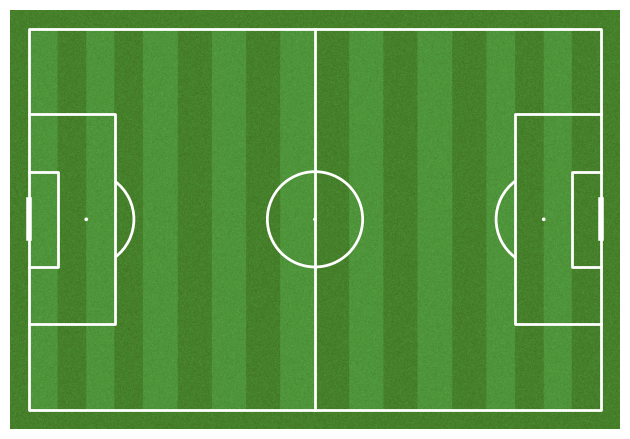

In [ ]:
from mplsoccer import Pitch
pitch = Pitch(pitch_color  ="grass", line_color = "white", stripe = True)
fig, ax = pitch.draw()
plt.show()

In [ ]:
df_laliga_game = df_laliga_shots[(df_laliga_shots.match_id == 9924)]
df_laliga_game

,id,location,match_id,minute,second,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,team,team_id,type,under_pressure,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_one_on_one,shot_redirect,shot_key_pass_id,shot_deflected,shot_open_goal,goalkeeper_lost_in_play,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
411348,b89e1c69-a2f3-4ba4-bb18-17ede738ce9d,"[108.4, 47.1]",9924,3,3,Regular Play,Luis Alberto Suárez Díaz,5246.0,Left Center Forward,6,Barcelona,217,"[15eede8f-12e1-43de-abe9-328e2e81f683, 8adfeac...",Barcelona,217,Shot,NaN,Right Foot,"[109.2, 47.0]",True,"[{'location': [109.6, 46.8], 'player': {'id': ...",NaN,NaN,c381e70b-5e2d-465d-809e-348e6329271a,NaN,NaN,NaN,Blocked,0.106394,Normal,Open Play
411349,5acf5296-cca3-40a5-84d1-90ae01e6f558,"[105.1, 14.1]",9924,6,58,Regular Play,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Wing,15,Real Madrid,220,[38b5af43-764c-4c40-81b7-c69bc2777ccd],Real Madrid,220,Shot,NaN,Right Foot,"[117.8, 36.8, 1.3]",NaN,"[{'location': [89.7, 21.7], 'player': {'id': 3...",NaN,NaN,315bc298-3cdc-4407-a358-7a072541aa67,NaN,NaN,NaN,Saved,0.006807,Normal,Open Play
411350,f38c74de-91ba-44b1-b95b-fc7e421536ea,"[111.7, 33.5]",9924,9,22,Regular Play,Luis Alberto Suárez Díaz,5246.0,Left Center Forward,25,Barcelona,217,[03ccdf5f-c212-4612-803a-e4c9c664a745],Barcelona,217,Shot,NaN,Right Foot,"[120.0, 43.1, 0.2]",True,"[{'location': [118.6, 38.9], 'player': {'id': ...",NaN,NaN,f21dea45-71e1-417c-860b-ce46dea09c40,NaN,NaN,NaN,Goal,0.121509,Volley,Open Play
411351,c1f8c418-e744-4dc8-8297-5b48c95c2c01,"[117.1, 38.2]",9924,14,0,Regular Play,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Wing,32,Real Madrid,220,"[5bc48f7d-c79b-4d53-a210-0c59393160e3, d3a4c44...",Real Madrid,220,Shot,True,Right Foot,"[120.0, 39.7, 1.3]",True,"[{'location': [116.2, 40.9], 'player': {'id': ...",NaN,NaN,197d601b-361d-4304-b506-c7ef000156c1,NaN,NaN,NaN,Goal,0.547923,Volley,Open Play
411352,f402b24b-32b1-488e-a14f-de82862adf59,"[111.7, 23.9]",9924,18,46,Regular Play,Jordi Alba Ramos,5211.0,Left Back,41,Barcelona,217,[fb693771-d0de-40c3-b8cb-657659ab9c5f],Barcelona,217,Shot,NaN,Left Foot,"[120.0, 35.2, 4.1]",True,"[{'location': [95.5, 52.6], 'player': {'id': 3...",NaN,NaN,5c00db55-c42c-4d00-a032-e5a4876454c8,NaN,NaN,NaN,Off T,0.019772,Volley,Open Play
411353,df052d1d-6b66-42c7-a380-f76a0dc10c8e,"[110.7, 45.3]",9924,23,56,From Goal Kick,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Wing,53,Real Madrid,220,[768f8e35-8560-4258-87dd-e0ac4df8ac16],Real Madrid,220,Shot,NaN,Head,"[120.0, 33.0, 5.3]",NaN,"[{'location': [96.2, 59.7], 'player': {'id': 5...",True,NaN,ca20bac5-904b-43e5-8b50-48d077a712ea,NaN,NaN,NaN,Off T,0.101221,Normal,Open Play
411354,272f61f9-8802-496a-8f89-d91bdd648f53,"[100.4, 28.5]",9924,25,31,Regular Play,Toni Kroos,5574.0,Left Center Midfield,57,Real Madrid,220,"[26960f1d-e598-4b1f-93e3-f60bd2eabc0f, 8c72b36...",Real Madrid,220,Shot,True,Left Foot,"[120.0, 35.9, 5.3]",NaN,"[{'location': [100.4, 29.5], 'player': {'id': ...",NaN,NaN,091bacb7-94fe-4c00-bfeb-d2b5f6a11590,NaN,NaN,NaN,Off T,0.037991,Normal,Open Play
411355,e31e92e2-4905-4ddc-b975-ae7e264b1bfc,"[106.8, 47.6]",9924,26,6,From Counter,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Wing,59,Real Madrid,220,[3c318a19-878b-4016-809e-83fdd9d733ee],Real Madrid,220,Shot,NaN,Right Foot,"[110.5, 46.4, 0.2]",True,"[{'location': [90.2, 58.1], 'player': {'id': 5...",NaN,NaN,49bc0fff-54c4-433c-a3bc-a0c95f1594ba,NaN,NaN,NaN,Saved,0.382480,Normal,Open Play
411356,bc7fa36b-507c-4e91-a9b9-964b692068d8,"[108.0, 26.1]",9924,27,11,From Counter,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Wing,59,Real Madrid,220,[c13357fc-fa32-428a-993d-49c6c20b0035],Real Madrid,220,Shot,NaN,Left Foot,"[120.0, 45.1, 0.2]",NaN,"[{'location': [100.0, 52.0], 'player': {'id': ...",NaN,NaN,a242ce15-e6b8-4c1c-98da-5c4a1394ca8d,NaN,NaN,NaN,Off T,0.090500,Normal,Open Play
411357,028ec253-7f76-4cec-87ec-ec30383f9766,"[114.1, 

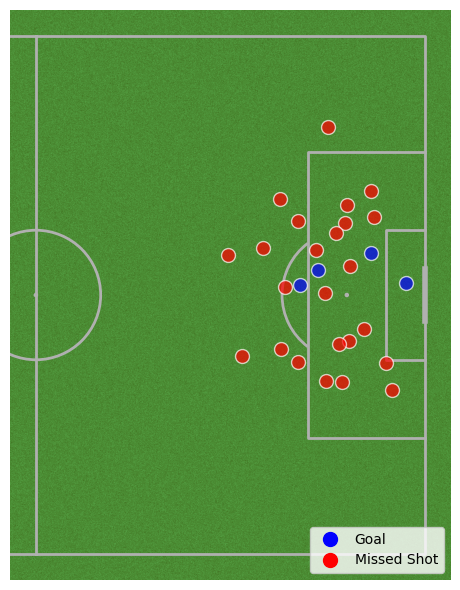

In [ ]:
# Shot map representing all the shots for a certain game

from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Plot the pitch using mplsoccer
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', half=True)
fig, ax = pitch.draw(figsize=(12, 6))

# Plot the shots on the pitch
shot_df = df_laliga_game
for i, shot in shot_df.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    if shot['shot_outcome'] == 'Goal':
        circle_color = 'blue'
    else:
        circle_color = 'red'
    ax.scatter(x, y, color=circle_color, zorder=5, edgecolors='white', linewidth=1, alpha=0.7, s=100)

# Legend
goal_marker = plt.Line2D([], [], linestyle='', marker='o', color='blue', markersize=10, label='Goal')
missed_shot_marker = plt.Line2D([], [], linestyle='', marker='o', color='red', markersize=10, label='Missed Shot')
ax.legend(handles=[goal_marker, missed_shot_marker], loc='lower right')

plt.show()

In [ ]:
# Shot ID to plot

df_laliga_model[(df_laliga_model["Target"]==1) & (df_laliga_model["id_shoot"]=="05696c18-98f8-4ffc-bfe3-e08aab606913")]

,id_shoot,gk_dis,pla_dis,goal_dis,goal_ang,goalkeeper_overcoming_angle,closest_player_angle,shot_body_part,shot_type,Qt_rivals_cone,Qt_teammate_cone,under_pressure,shot_first_time,shot_one_on_one,Target,shot_statsbomb_xg
80,05696c18-98f8-4ffc-bfe3-e08aab606913,5.703508,1.772005,8.45281,48.546382,14.118022,90.261965,Left Foot,Open Play,1,0,NaN,True,NaN,1,0.440972


In [ ]:
# df_laliga_freeze["location_freeze"] = df_laliga_freeze["location_freeze"].apply(extract_coordinates)

In [ ]:
# Select the shot to plot it on the pitch
df_one_shot_analysis = df_laliga_freeze[df_laliga_freeze.id =='05696c18-98f8-4ffc-bfe3-e08aab606913']


In [ ]:
df_shooter = df_one_shot_analysis[df_one_shot_analysis["player"].notnull()][["player", "location", "shot_freeze_frame"]]

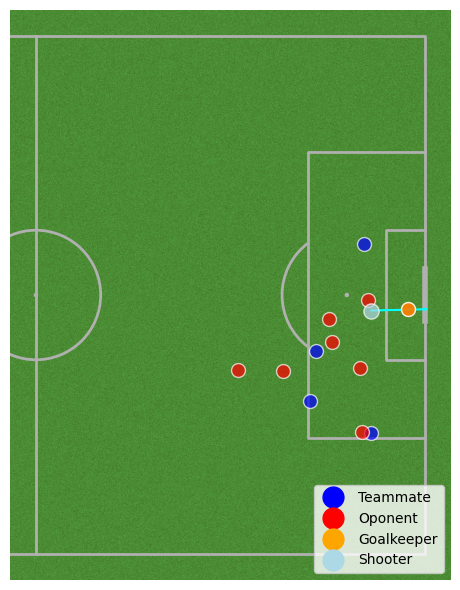

In [ ]:

from mplsoccer import Pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', half=True)
fig, ax = pitch.draw(figsize=(12, 6))

# Plot the shots on the pitch

teammates = df_one_shot_analysis[df_one_shot_analysis['teammate_freeze'] == True]
no_teammates = df_one_shot_analysis[df_one_shot_analysis['teammate_freeze'] == False]
df_shooter = df_one_shot_analysis[df_one_shot_analysis["player"].notnull()][["player", "location", "shot_freeze_frame"]].iloc[0]

for i, teammate in teammates.iterrows():
    x = teammate['location_freeze'][0]
    y = teammate['location_freeze'][1]
    if teammate['player_name_freeze'] is not None:
        ax.scatter(x, y, color='blue', zorder=12, edgecolors='white', linewidth=1, alpha=0.7, s=100)

for i, no_teammate in no_teammates.iterrows():
    x = no_teammate['location_freeze'][0]
    y = no_teammate['location_freeze'][1]
    if no_teammate['player_name_freeze'] is not None:
        ax.scatter(x, y, color='red', zorder=12, edgecolors='white', linewidth=1, alpha=0.7, s=100)

# Plot the goalkeeper positions in green
goalkeepers = df_one_shot_analysis[df_one_shot_analysis['player_position_name_freeze'] == "Goalkeeper"]
for i, goalkeeper in goalkeepers.iterrows():
    x = goalkeeper['location_freeze'][0]
    y = goalkeeper['location_freeze'][1]
    ax.scatter(x, y, color='orange', zorder=12, edgecolors='white', linewidth=1, alpha=0.7, s=100)

shooter_location = df_shooter['location']
shooter_x = shooter_location[0]
shooter_y = shooter_location[1]
if df_shooter['player'] is not None:
    ax.scatter(shooter_x, shooter_y, color='lightblue', zorder=12, edgecolors='white', linewidth=1, alpha=0.7, s=120)

# Ball trajectory
dx = np.array(list(df_one_shot_analysis.shot_end_location))[0][0] - shooter_x
dy = np.array(list(df_one_shot_analysis.shot_end_location))[0][1] - shooter_y
shotArrow = plt.arrow(shooter_x, shooter_y, dx, dy, width=0.1, color="cyan")

# Add legend
teammate_marker = plt.Line2D([], [], linestyle='', marker='o', color='blue', markersize=15, label='Teammate')
no_teammate_marker = plt.Line2D([], [], linestyle='', marker='o', color='red', markersize=15, label='Oponent')
goalkeeper_marker = plt.Line2D([], [], linestyle='', marker='o', color='orange', markersize=15, label='Goalkeeper')
shooter_marker = plt.Line2D([], [], linestyle='', marker='o', color='lightblue', markersize=15, label='Shooter')
ax.legend(handles=[teammate_marker, no_teammate_marker, goalkeeper_marker, shooter_marker], loc='lower right')

plt.show()



###**Exploratory Data Analysis**

In [ ]:
# Number of matches by Competition
competition_counts = df_matches['competition'].value_counts().reset_index()
competition_counts.columns = ['competition', 'count']

fig = px.bar(competition_counts, x='count', y='competition', text='count', orientation='h')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(title='Number of Matches by Competition', xaxis_title='Number of Matches')

fig.show()



In [ ]:
df_laliga_shot_plot = df_laliga_shots.groupby('shot_outcome').count().reset_index()

fig = px.bar(df_laliga_shot_plot, x='shot_outcome', y='id', color = 'shot_outcome')

fig.update_layout(
    yaxis=dict(
        title='Laliga Shot Outcomes'))

fig.show()

In [ ]:
import plotly.express as px

df_laliga_shots['Flag_Goal'] = (df_laliga_shots['shot_outcome'] == 'Goal').astype(int)
df_laliga_shot_plot = df_laliga_shots.groupby('Flag_Goal').count().reset_index()

fig = px.bar(df_laliga_shot_plot, x='Flag_Goal', y='id', color='Flag_Goal')
fig.update_layout(yaxis=dict(title="Number of Shots in La Liga"))

fig.show()


In [ ]:
shot_outcomes = df_laliga_shots["shot_body_part"].value_counts().reset_index()
shot_outcomes.columns = ["Outcome", "Count"]

fig = px.pie(shot_outcomes, names="Outcome", values="Count", title="La Liga Shot Outcomes")
fig.update_layout(width=500, height=400)  # Set the width and height according to your preference
fig.show()


In [ ]:
df_laliga_shot_plot = df_laliga_shots.groupby('play_pattern').count().reset_index()

fig = px.bar(df_laliga_shot_plot, x='play_pattern', y='id', color = 'play_pattern')

fig.update_layout(
    yaxis=dict(
        title='Laliga Shot Patterns'))

fig.show()

In [ ]:
laliga_goals = df_laliga_shots[df_laliga_shots["shot_outcome"] == "Goal"]["play_pattern"]
shot_pattern = laliga_goals.value_counts().reset_index()
shot_pattern.columns = ["Pattern", "Count"]

fig = px.bar(shot_pattern, x="Pattern", y="Count", title="La Liga Goal Patterns", color="Pattern")
fig.show()

In [ ]:
df_goal_events = df_events[(df_events.type=='Shot') & (df_events.shot_type=='Open Play')]
df_goal_events.shape

(76012, 119)

In [ ]:
df_goal_events[df_goal_events["shot_outcome"]=="Goal"].shape

(7871, 119)

In [ ]:

df_goal_events['goal'] = (df_goal_events.shot_outcome == 'Goal')



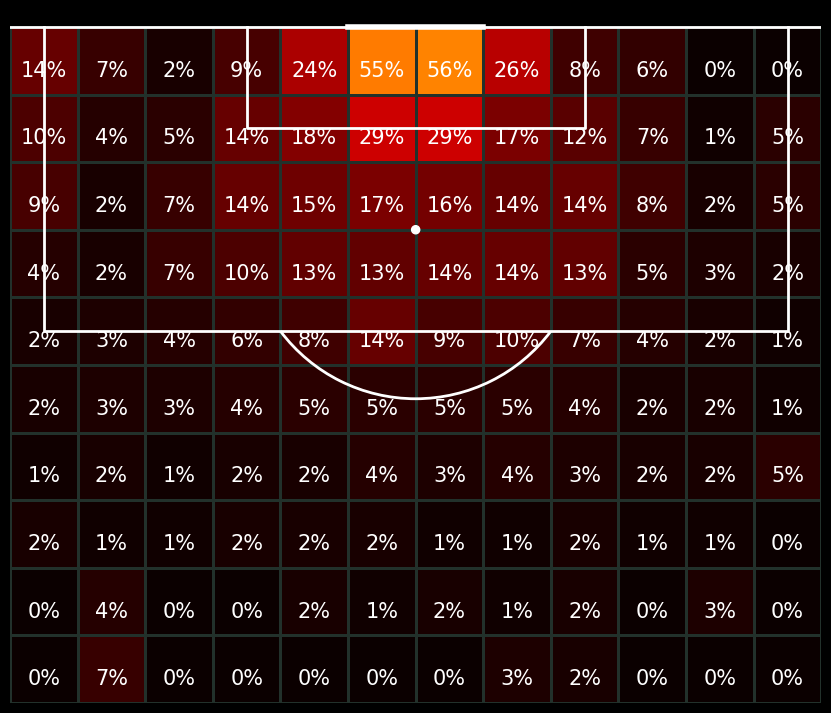

In [ ]:
# Goal Probability HeatMap
x = [float(str(coord[0]).replace(',', '')) for coord in df_goal_events['location']]
y = [float(str(coord[1]).replace(',', '')) for coord in df_goal_events['location']]
plt.style.use('dark_background')
pitch = VerticalPitch(half=True, line_zorder=2, pad_left=-16, pad_right=-16, pad_bottom=-20, pad_top=1)
fig, ax = pitch.draw(figsize=(16, 9), tight_layout=False)
bs = pitch.bin_statistic(x, y, df_goal_events.goal, statistic='mean', bins=(30, 20))
bs['statistic'] = np.round(np.nan_to_num(bs['statistic']) * 100., 0).astype(np.int32)
pcm = pitch.heatmap(bs, ax=ax, cmap='hot', edgecolors='#22312b')
bs['statistic'] = (pd.DataFrame(bs['statistic']).round(0).astype(np.int32).applymap(lambda x: '{:d}%'.format(x)).values)
annotation = pitch.label_heatmap(bs, color='white', fontsize=15, ax=ax, ha='center', va='top', zorder=3)
